In [1]:
# K means cluster is unsupervised learning
# k is free parameter  u have to tell algo what is vlaue of k

# start with k centroid by putting them at random place k = 3

In [6]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


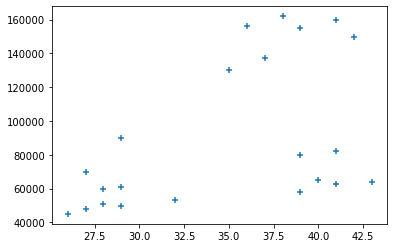

In [14]:
# Lets check out cluster formation in graph 
plt.scatter(df['Age'], df['Income($)'], marker = '+')

# so here looks three clusters

In [15]:
# Lets find value of K 
km = KMeans(n_clusters = 3) # here no of clusters is = 3 from above figure
km

KMeans(n_clusters=3)

In [17]:
# lets make some fit and prediction
# IN UNSUPERVISED LEARNING WE USE FIT_PREDICT AT A TIME

y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [20]:
# Lets make cluster columns for scatter plot
df['Cluster'] = y_pred
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


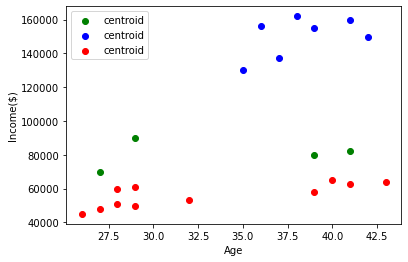

In [42]:
# Dividing cluster's into different df's like of 0, 1,2
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]


# Now represent this clusters


plt.scatter(df0.Age, df0['Income($)'], color = 'g',label = 'centroid' )
plt.scatter(df1.Age, df1['Income($)'], color = 'b', label = 'centroid')
plt.scatter(df2.Age, df2['Income($)'], color = 'r', label = 'centroid')

# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '+', label = 'centroid', s= 10)
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()


In [53]:
# In above figure cluster is not grouped/scaled features properly
# So we would use MinMaxScaler for this scaling
# MinMaxScaler will write 0--->1 scaler value
scaler = MinMaxScaler()

# Lets train Income for scaler value

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df

# Lets train Age for scaler value
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [56]:
# Lets do KMeans clustering again based on scaler vlues
km = KMeans(n_clusters = 3) # here no of clusters is = 3 from above figure
km

y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

# cluster values are better
df['Cluster'] = y_pred
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [60]:
# Values of 3 Centroids
km.cluster_centers_
# value of X =0.85294118 and Y=0.2022792

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

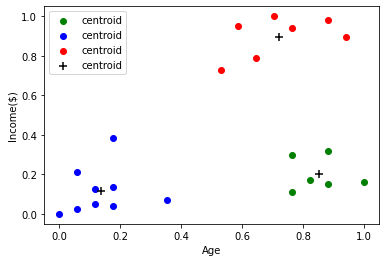

In [64]:
# lets make plotting again

df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]


# Now represent this clusters


plt.scatter(df0.Age, df0['Income($)'], color = 'g',label = 'centroid' )
plt.scatter(df1.Age, df1['Income($)'], color = 'b', label = 'centroid')
plt.scatter(df2.Age, df2['Income($)'], color = 'r', label = 'centroid')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', marker = '+', label = 'centroid', s= 50)
# km.cluster_centers_[:, 0] means columns 0 from above centroid table, km.cluster_centers_[:, 1] means columns 1

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()


In [ ]:
# In real life when data is messy you can use elbow plot method
# find rnge of k values and then sum square error sse

In [66]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', "Income($)"]])
    sse.append(km.inertia_)

In [67]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.26217927623452125,
 0.22037641690770662,
 0.16858512236029757,
 0.13265419827245162,
 0.10663983840905439]

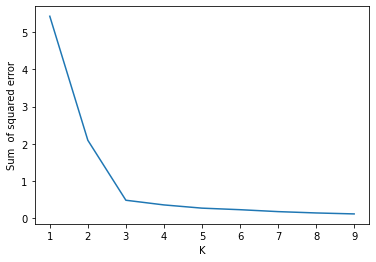

In [68]:
# Lets plot elbowplot algo
plt.xlabel('K')
plt.ylabel('Sum  of squared error')
plt.plot(k_rng, sse)


# Here is your elbow plot

# Excercise Iris dataset

In [69]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [70]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [71]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [82]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [84]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [85]:
df['flower']= iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [91]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)

KeyError: "['sepal length (cm)' 'sepal width (cm)'] not found in axis"

In [92]:
df.head(3)

,petal length (cm),petal width (cm),flower
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0


In [94]:
# lets do some clustering
# Lets find value of K 
km = KMeans(n_clusters = 3) # here no of clusters is = 3 from above figure
km

KMeans(n_clusters=3)

In [97]:
y_pred = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [98]:
# Lets make cluster columns for scatter plot
df['Cluster'] = y_pred
df.head()

,petal length (cm),petal width (cm),flower,Cluster
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0


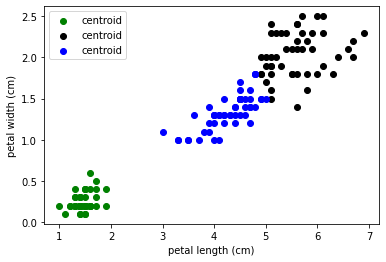

In [101]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]


# Now represent this clusters


plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'g',label = 'centroid' )
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'black',label = 'centroid' )
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'blue',label = 'centroid' )

# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '+', label = 'centroid', s= 10)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()

In [102]:
# In above figure cluster is not grouped/scaled features properly
# So we would use MinMaxScaler for this scaling
# MinMaxScaler will write 0--->1 scaler value
scaler = MinMaxScaler()

# Lets train Income for scaler value

scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
df

# Lets train Age for scaler value
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])
df

,petal length (cm),petal width (cm),flower,Cluster
0,0.067797,0.041667,0,0
1,0.067797,0.041667,0,0
2,0.050847,0.041667,0,0
3,0.084746,0.041667,0,0
4,0.067797,0.041667,0,0
...,...,...,...,...
145,0.711864,0.916667,2,1
146,0.677966,0.750000,2,1
147,0.711864,0.791667,2,1
148,0.745763,0.916667,2,1


In [104]:
# Lets do KMeans clustering again based on scaler vlues
km = KMeans(n_clusters = 3) # here no of clusters is = 3 from above figure
km

y_pred = km.fit_predict(df[['petal width (cm)', 'petal length (cm)']])
y_pred

# cluster values are better
df['Cluster'] = y_pred
df

,petal length (cm),petal width (cm),flower,Cluster
0,0.067797,0.041667,0,0
1,0.067797,0.041667,0,0
2,0.050847,0.041667,0,0
3,0.084746,0.041667,0,0
4,0.067797,0.041667,0,0
...,...,...,...,...
145,0.711864,0.916667,2,2
146,0.677966,0.750000,2,2
147,0.711864,0.791667,2,2
148,0.745763,0.916667,2,2


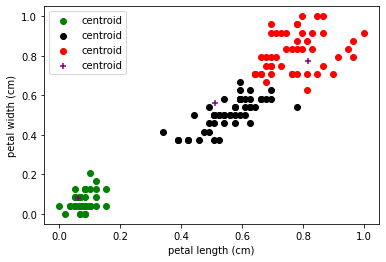

In [107]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]


# Now represent this clusters


plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'g',label = 'centroid' )
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'black',label = 'centroid' )
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'red',label = 'centroid' )

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '+', label = 'centroid', s= 30)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()

In [109]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['petal length (cm)', "petal width (cm)"]])
    sse.append(km.inertia_)

In [110]:
sse

[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.1611128497903638,
 0.8538617353912238,
 0.6800800986587507,
 0.5651273455703979,
 0.48580845539143697,
 0.4401885127325659]

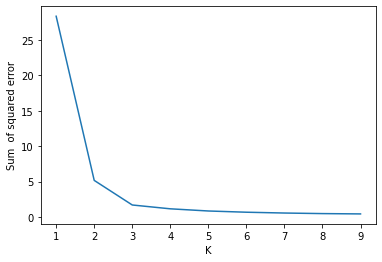

In [111]:
# Lets plot elbowplot algo
plt.xlabel('K')
plt.ylabel('Sum  of squared error')
plt.plot(k_rng, sse)


# Here is your elbow plot at point 2